Grade=100/100

# Introduction:

This lab was designed to teach us how to calibrate a telescope and learn how exactly a ccd works. We used images we took with the Angell Hall 0.4 mm telescope to find the Gain, Read Noise, Linearity, and the Dark current of the telescope, which is useful for real-life observation in that you would need to calculate each of these things in order to get real usable data. 

# Theory:

In the lab we would like to find the Read Noise. Ideally you would like a small read noise, as it is defined as the standard deviation from the mean value at any given pixel. To find the read noise, you first must find the gain, which is the conversion factor between electrons and ADU. 

A flat frame is a frame of uniform flux, and a bias is a frame of zero exposure time.

F represents a flat frame and B represents the Bias frames:

$\text{Gain}=\frac{(\bar{F_1}-\bar{F_2})-(\bar{B_1}-\bar{B_2})}{\sigma^2_{F_1-F_2}-\sigma^2_{B_1-B_2}}$

$\text{Read Noise} = \frac{\text{Gain}\cdot \sigma_{B_1-B_2}}{\sqrt{2}}$

Linearity has to do with the counts of the ccd. Each ccd should have a linear relation with counts and exposure time, but they have a limit. We found this limit by graphing mean counts and exposure times, and finding where the linearity of the function is broken.

Dark Current is caused by electrons that are excited due to a temperature increase. 

$\text{Dark Current} =    A{T^{3/2}}/{2e^{\frac{-E_g}{2kT}}}$

# Methodology 

For the Gain, we took 10 Bias frames, and 10 Flat Frames. We only ended up using a couple because of time constraints, but they were all pretty consistent. We calculated the Gain, and then plugged that into the read noise. We then took more data for linearity, taking images at increasing exposure times until we got an image that looked like it broke the image. We then plotted it. For dark current we took frames with the cooling off on the telescope, we took enough that it would increase the counts in the ccd pixels.


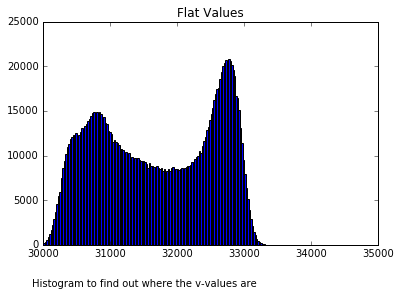

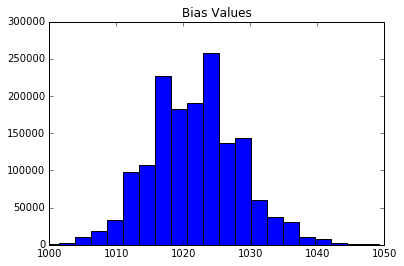

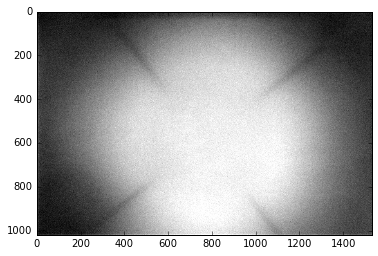

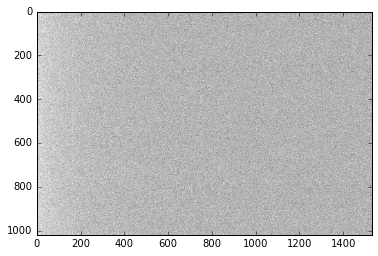

In [22]:
%matplotlib inline
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


IMG_H = 1020
IMG_W = 1530
n_sample = 10
Flats = np.empty(shape=(n_sample,IMG_H,IMG_W), dtype=np.float32)
Bias = np.empty(shape=(n_sample,IMG_H,IMG_W), dtype=np.float32)
for i in range (1,10):
    a = (fits.getdata('/Users/bditt/WORKHERE/ccdrep/Spoopy.0000000%d.FlatField.fit' %(i)))
    Flats[i,:,:] = a
    b = (fits.getdata('/Users/bditt/WORKHERE/ccdrep/Spoopy.0000000%d.Bias.fit' %(i)))
    Bias[i,:,:] = b
plt.figure()
plt.hist(Flats[1,:,:].flatten(), bins=1000)
plt.title('Flat Values')
plt.figtext(.1,-.02, 'Histogram to find out where the v-values are')
plt.xlim(30000,35000)
plt.figure()
plt.hist(Bias[1,:,:].flatten(), bins=1000)
plt.title('Bias Values')
plt.figtext(.1,-.02, 'Histogram to find out where the v-values are')
plt.xlim(1000,1050)
plt.figure()
plt.imshow(Flats[1,:,:],cmap=plt.get_cmap('gray'), vmin = 30000, vmax = 33000)
plt.figtext(.1,-.02, 'Actual image for flat')
plt.figure()
plt.imshow(Bias[1,:,:],cmap=plt.get_cmap('gray'), vmin = 950, vmax = 1050)
plt.figtext(.1,-.02, 'Actual image for bias')


In [23]:

avgflat1 = np.mean(Flats[1,:,:])
avgflat2 = np.mean(Flats[2,:,:])
avgbias1 = np.mean(Bias[1,:,:])
avgbias2 = np.mean(Bias[1,:,:])
Fl = Flats[1,:,:] - Flats[2,:,:]
Fl = Fl**2
Var_flat = np.mean(Fl)


Bi = Bias[1,:,:]- Bias[2,:,:]
Bi = Bi**2
Var_Bias = np.mean(Bi)



gain = ((avgflat1 + avgflat2) - (avgbias1 + avgbias2))/(Var_flat - Var_Bias)
print 'Gain: ',gain

sigbias = np.sqrt(Var_Bias)
ReadNoise = (gain * sigbias)/np.sqrt(2)
print 'Read Noise: ',ReadNoise

Gain:  2.7322
Read Noise:  16.8220709718


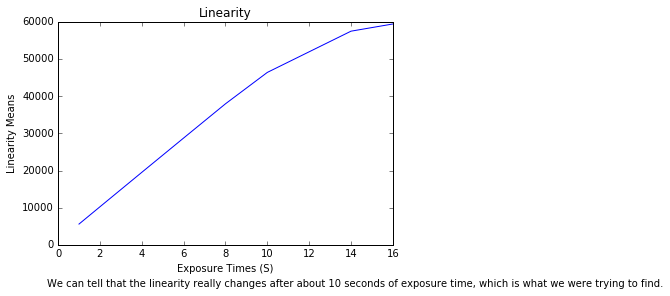

In [26]:
root = '/Users/bditt/WORKHERE/ccdrep/Linearity/'
LinearityFiles = [root + 'TeamSpoopyLin.00000001.FlatField.fit',
                 root + 'TeamSpoopyLin.00000002.FlatField.fit',
                 root + 'TeamSpoopyLin.00000003.FlatField.fit',
                 root + 'TeamSpoopyLin.00000004.FlatField.fit',
                 root + 'TeamSpoopyLin.00000005.FlatField.fit',
                 root + 'TeamSpoopyLin.00000006.FlatField.fit',
                 root + 'TeamSpoopyLin.00000007.FlatField.fit',
                 root + 'TeamSpoopyLin.00000008.FlatField.fit']
exptimes = []
linmeans = []
for files in LinearityFiles:
    lin = fits.open(files)
    lin.info
    linheader = lin[0].header
    lindata = lin[0].data
    exptimes.append(linheader['EXPTIME'])
    linmeans.append(np.mean(lindata))
plt.figure()
plt.plot(exptimes, linmeans)
plt.title('Linearity')
plt.xlabel('Exposure Times (S)')
plt.ylabel('Linearity Means')
plt.figtext(.1,-.02, 'We can tell that the linearity really changes after about 10 seconds of exposure time, which is what we were trying to find.')
plt.show()

In [29]:
temps = []
means = []
root2 = '/Users/bditt/WORKHERE/ccdrep/Dark Current/'
DarkCurrentFiles = [#root2 + 'TeamSpoopy.00000001.Dark.fit',
                   #root2 + 'TeamSpoopy.00000002.Dark.fit',
                   #root2 + 'TeamSpoopy.00000003.Dark.fit',
                   #root2 + 'TeamSpoopy.00000004.Dark.fit',
                   root2 + 'TeamSpoopy.00000005.Dark.fit',
                   root2 + 'TeamSpoopy.00000006.Dark.fit',
                   root2 + 'TeamSpoopy.00000007.Dark.fit',
                   root2 + 'TeamSpoopy.00000008.Dark.fit',
                   root2 + 'TeamSpoopy.00000009.Dark.fit',
                   root2 + 'TeamSpoopy.00000010.Dark.fit',
                   root2 + 'TeamSpoopy.00000011.Dark.fit',
                   root2 + 'TeamSpoopy.00000012.Dark.fit',
                   root2 + 'TeamSpoopy.00000013.Dark.fit',
                   root2 + 'TeamSpoopy.00000014.Dark.fit',
                   root2 + 'TeamSpoopy.00000015.Dark.fit',]
for files in DarkCurrentFiles:
    dark = fits.open(files)
    dark.info
    darkheader = dark[0].header
    darkdata = dark[0].data
    temps.append(darkheader['CCD-TEMP'] + 273.15)
    means.append(np.mean(darkdata) - Var_Bias)
 
#Converting to an array
temps = np.array(temps)
means = np.array(means)
means += 3









a:  [ 25402091.24743545]
Eg: ~1.778e-19


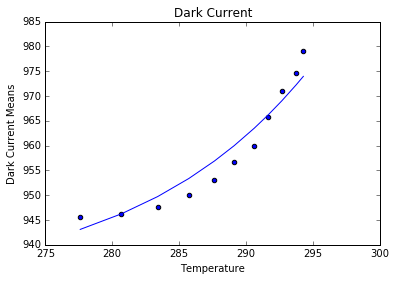

In [34]:
plt.figure()
plt.scatter(temps, means)
plt.title('Dark Current')
plt.xlabel('Temperature')
plt.ylabel('Dark Current Means')

#Defining the function for dark current
k = 1.38*10**(-23)
def func(temps, a):
    return a*temps**(3.0/2.0)*np.exp((-6434)/(temps)) + 933

#Curve fit
popt, pcov = curve_fit(func, temps, means, [1])

print 'a: ', popt
print 'Eg: ~1.778e-19'


plt.plot(temps, func(temps, *popt))
   
plt.show()


# Conclusion:

The Gain of the MDM is roughly 2.2 - 2.4, which is similar to our value of around 2.7 electrons per ADU. Our read noise was quite a bit more than theirs, ours was about 17 electrons, and theirs was only 5.